## 전국 재활용센터 표준데이터

### 사용 라이브러리

In [175]:
# 라이브러리 import
import requests
import pprint
import json
import platform
import missingno
import folium
import matplotlib.pyplot as plt
import numpy as np

In [176]:
# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    # 음수(-)가 깨지는 현상 방지

plt.rcParams['axes.unicode_minus'] = False

### 1.0 API 불러오기

In [130]:
url = 'http://api.data.go.kr/openapi/tn_pubr_public_ruse_cnter_api'
params ={'serviceKey' : '6p+v7yCFLXe0EtUwm2Ez3Xltc31YbXQ3yYjobHAxz+yi4Oh0CxvdDs39XKxyhBPjYU+Bjt6CxBwZ4eXHL+Xqyg==', 
'pageNo' : '1', 
'numOfRows' : '1000', 
'type' : 'json', 
}
response = requests.get(url, params=params)

# 데이터 값 출력
contents = response.text

In [131]:
# 데이터 결과값 깔끔하게 출력
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

('{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE","type":"json"},"body":{"items":[{"cnterNm":"보령시 '
 '공공재활용 기반시설","cnterOperSe":"위탁","rdnmadr":"충청남도 보령시 해안로 543","lnmadr":"충청남도 '
 '보령시 남곡동 '
 '1145-8","latitude":"36.33793953","longitude":"126.5385437","ar":"736","fondYm":"2008-08","carHoldCo":"1","trtmntPrdlst":"플라스틱류, '
 '스티로폼, 캔 '
 '등","operInstitutionNm":"삼원환경산업㈜","operPhoneNumber":"041-931-1420","rprsntvNm":"남궁훈","weekdayOperOpenHhmm":"09:00","weekdayOperColseHhmm":"18:00","holidayOperOpenHhmm":"00:00","holidayCloseOpenHhmm":"00:00","rstdeInfo":"일요일,공휴일","asSvcIfo":"재활용품 '
 '선별","homepageUrl":"없음","phoneNumber":"041-930-3676","institutionNm":"충청남도 '
 '보령시","referenceDate":"2021-04-01","insttCode":"4510000"},{"cnterNm":"동구자원재활용센터","cnterOperSe":"위탁","rdnmadr":"대구광역시 '
 '동구 공항로31길 26(불로동)","lnmadr":"대구광역시 동구 불로동 '
 '866-9","latitude":"35.903514","longitude":"128.6309954","ar":"3667.9","fondYm":"1999-07","carHoldCo":"34","trtmntPrdlst":"플라스틱+캔+유리병 '
 '등","operIns

In [132]:
# 문자열을 json으로 변경
json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob)) # json타입 확인

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE', 'type': 'json'}, 'body': {'items': [{'cnterNm': '보령시 공공재활용 기반시설', 'cnterOperSe': '위탁', 'rdnmadr': '충청남도 보령시 해안로 543', 'lnmadr': '충청남도 보령시 남곡동 1145-8', 'latitude': '36.33793953', 'longitude': '126.5385437', 'ar': '736', 'fondYm': '2008-08', 'carHoldCo': '1', 'trtmntPrdlst': '플라스틱류, 스티로폼, 캔 등', 'operInstitutionNm': '삼원환경산업㈜', 'operPhoneNumber': '041-931-1420', 'rprsntvNm': '남궁훈', 'weekdayOperOpenHhmm': '09:00', 'weekdayOperColseHhmm': '18:00', 'holidayOperOpenHhmm': '00:00', 'holidayCloseOpenHhmm': '00:00', 'rstdeInfo': '일요일,공휴일', 'asSvcIfo': '재활용품 선별', 'homepageUrl': '없음', 'phoneNumber': '041-930-3676', 'institutionNm': '충청남도 보령시', 'referenceDate': '2021-04-01', 'insttCode': '4510000'}, {'cnterNm': '동구자원재활용센터', 'cnterOperSe': '위탁', 'rdnmadr': '대구광역시 동구 공항로31길 26(불로동)', 'lnmadr': '대구광역시 동구 불로동 866-9', 'latitude': '35.903514', 'longitude': '128.6309954', 'ar': '3667.9', 'fondYm': '1999-07', 'carHoldCo': '34', 'trt

In [133]:
# 필요한 내용만 꺼내기
body = json_ob['response']['body']['items']
print(body)

[{'cnterNm': '보령시 공공재활용 기반시설', 'cnterOperSe': '위탁', 'rdnmadr': '충청남도 보령시 해안로 543', 'lnmadr': '충청남도 보령시 남곡동 1145-8', 'latitude': '36.33793953', 'longitude': '126.5385437', 'ar': '736', 'fondYm': '2008-08', 'carHoldCo': '1', 'trtmntPrdlst': '플라스틱류, 스티로폼, 캔 등', 'operInstitutionNm': '삼원환경산업㈜', 'operPhoneNumber': '041-931-1420', 'rprsntvNm': '남궁훈', 'weekdayOperOpenHhmm': '09:00', 'weekdayOperColseHhmm': '18:00', 'holidayOperOpenHhmm': '00:00', 'holidayCloseOpenHhmm': '00:00', 'rstdeInfo': '일요일,공휴일', 'asSvcIfo': '재활용품 선별', 'homepageUrl': '없음', 'phoneNumber': '041-930-3676', 'institutionNm': '충청남도 보령시', 'referenceDate': '2021-04-01', 'insttCode': '4510000'}, {'cnterNm': '동구자원재활용센터', 'cnterOperSe': '위탁', 'rdnmadr': '대구광역시 동구 공항로31길 26(불로동)', 'lnmadr': '대구광역시 동구 불로동 866-9', 'latitude': '35.903514', 'longitude': '128.6309954', 'ar': '3667.9', 'fondYm': '1999-07', 'carHoldCo': '34', 'trtmntPrdlst': '플라스틱+캔+유리병 등', 'operInstitutionNm': '㈜유창알앤씨', 'operPhoneNumber': '053-985-3840', 'rprsntvNm': '성기원

### 데이터 구조 파악

In [134]:
# pandas import
import pandas as pd
from pandas.io.json import json_normalize

# Dataframe으로 만들기
df = json_normalize(body)

df

C:\Users\User\AppData\Local\Temp\ipykernel_6476\1113748266.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(body)


,cnterNm,cnterOperSe,rdnmadr,lnmadr,latitude,longitude,ar,fondYm,carHoldCo,trtmntPrdlst,...,weekdayOperColseHhmm,holidayOperOpenHhmm,holidayCloseOpenHhmm,rstdeInfo,asSvcIfo,homepageUrl,phoneNumber,institutionNm,referenceDate,insttCode
0,보령시 공공재활용 기반시설,위탁,충청남도 보령시 해안로 543,충청남도 보령시 남곡동 1145-8,36.33793953,126.5385437,736,2008-08,1,"플라스틱류, 스티로폼, 캔 등",...,18:00,00:00,00:00,"일요일,공휴일",재활용품 선별,없음,041-930-3676,충청남도 보령시,2021-04-01,4510000
1,동구자원재활용센터,위탁,대구광역시 동구 공항로31길 26(불로동),대구광역시 동구 불로동 866-9,35.903514,128.6309954,3667.9,1999-07,34,플라스틱+캔+유리병 등,...,17:00,08:00,12:00,일요일,,,053-662-2723,대구광역시 동구청,2021-05-25,3420000
2,대영기업,위탁,울산광역시 남구 여천로 174,울산광역시 남구 여천동 1460,35.52604103,129.3528164,2288.29,1991-12,13,"합성수지, 파지, 고철외",...,17:30,08:00,17:30,매주일요일,,,052-241-7812,울산광역시 북구청,2021-06-30,3720000
3,진주시재활용품선별장,위탁,경상남도 진주시 내동면 유수길 75번길 27,경상남도 진주시 내동면 유수리 1014,35.1223113352,128.0145496,1750,2011-01,0,"종이류, 종이팩, 플라스틱, 유리병류, 스티로폼, 필름류 등",...,16:00,07:00,16:00,일요일,,,055-749-5181,경상남도 진주시청,2021-07-02,5310000
4,안동시 재활용품선별장,직영,경상북도 안동시 배고개길 84,경상북도 안동시 수하동 742-1,36.5486584353,128.6716658059,680,1997-06,20,스티로폼+플라스틱 등 재활용 자원,...,18:00,00:00,00:00,"매주 토, 일요일",없음,없음,054-840-3880,경상북도 안동시청,2021-06-30,5070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,수영종합재활용센터,위탁,부산광역시 수영구 연수로 365(수영동),,35.17085857,129.110318,132,2021-11,1,중고가전,...,19:00,00:00,00:00,"매주일요일, 공휴일",,,051-610-4455,부산광역시 수영구,2022-01-21,3380000
215,수영구재활용센터,위탁,부산광역시 수영구 수영로741번길 12(수영동),,35.1684064,129.1207317,33,1998-05,1,중고가전,...,18:00,00:00,00:00,"매주일요일, 공휴일",,,051-610-4455,부산광역시 수영구,2022-01-21,3380000
216,"팔도중고가전,가구마트",위탁,부산광역시 수영구 수미로 62(수영동),,35.17307547,129.117523,39,2021-11,1,가전 가구,...,18:00,00:00,00:00,"매주일요일, 공휴일",,,051-610-4455,부산광역시 수영구,2022-01-21,3380000
217,춘천시 도시형종합폐기물처리시설 재활용선별센터,위탁,강원도 춘천시 신동면 한치로 681-1,강원도 춘천시 신동면 혈동리 548-7,37.797263,127.679831,3245,2012-01,3,종이류+플라스틱류+스티로폼류+캔류+고철류+기타,...,17:30,08:30,17:30,토+일+법정공휴일,,,033-245-5228,강원도 춘천시청,2022-01-18,4180000


In [135]:
# Dataframe csv 파일로 저장
#df.to_csv('api.csv',encoding='cp949')

### 2.0 데이터 탐색 및 전처리

In [136]:
# 컬럼(column) 삭제
df.drop(['lnmadr', 'cnterOperSe', 'fondYm', 'operInstitutionNm', 'operPhoneNumber', 'rprsntvNm', 
         'weekdayOperOpenHhmm', 'weekdayOperColseHhmm', 'holidayOperOpenHhmm',
         'holidayCloseOpenHhmm', 'rstdeInfo', 'asSvcIfo', 'homepageUrl',
         'phoneNumber', 'referenceDate', 'insttCode'], axis=1, inplace=True)

In [137]:
df.head()

,cnterNm,rdnmadr,latitude,longitude,ar,carHoldCo,trtmntPrdlst,institutionNm
0,보령시 공공재활용 기반시설,충청남도 보령시 해안로 543,36.33793953,126.5385437,736,1,"플라스틱류, 스티로폼, 캔 등",충청남도 보령시
1,동구자원재활용센터,대구광역시 동구 공항로31길 26(불로동),35.903514,128.6309954,3667.9,34,플라스틱+캔+유리병 등,대구광역시 동구청
2,대영기업,울산광역시 남구 여천로 174,35.52604103,129.3528164,2288.29,13,"합성수지, 파지, 고철외",울산광역시 북구청
3,진주시재활용품선별장,경상남도 진주시 내동면 유수길 75번길 27,35.1223113352,128.0145496,1750,0,"종이류, 종이팩, 플라스틱, 유리병류, 스티로폼, 필름류 등",경상남도 진주시청
4,안동시 재활용품선별장,경상북도 안동시 배고개길 84,36.5486584353,128.6716658059,680,20,스티로폼+플라스틱 등 재활용 자원,경상북도 안동시청


In [138]:
# 누락값 확인
df2=df.replace(to_replace='',value=None)

df2.isna().sum()

cnterNm          0
rdnmadr          3
latitude         1
longitude        1
ar               0
carHoldCo        0
trtmntPrdlst     0
institutionNm    0
dtype: int64

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cnterNm        219 non-null    object
 1   rdnmadr        216 non-null    object
 2   latitude       218 non-null    object
 3   longitude      218 non-null    object
 4   ar             219 non-null    object
 5   carHoldCo      219 non-null    object
 6   trtmntPrdlst   219 non-null    object
 7   institutionNm  219 non-null    object
dtypes: object(8)
memory usage: 13.8+ KB


<AxesSubplot:>

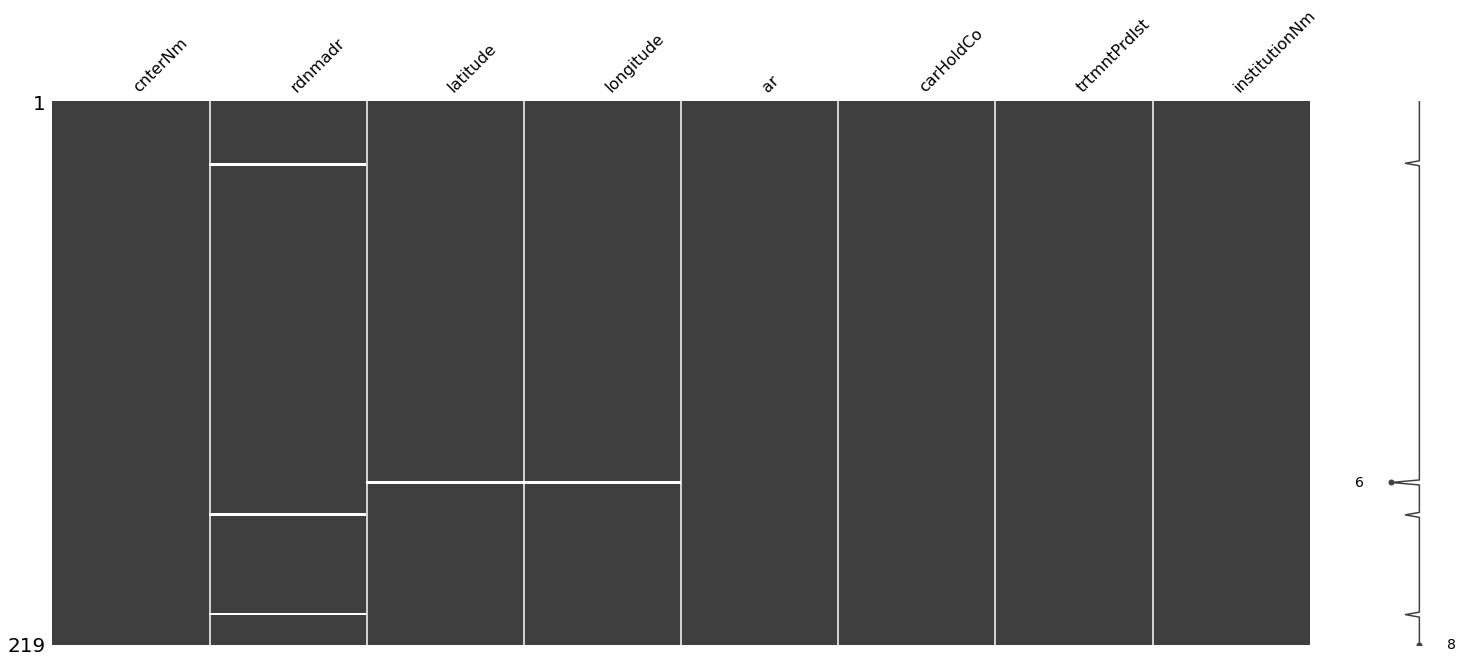

In [140]:
# 모듈 설치
#! pip install missingno

missingno.matrix(df2)

In [141]:
# 누락값 된 row 확인

df2[df2['rdnmadr'].isna()].index
df2[df2['latitude'].isna()].index
df2[df2['longitude'].isna()].index

## Int64Index([25, 166, 206], dtype='int64')
##Int64Index([153], dtype='int64')
##Int64Index([153], dtype='int64')

# Dataframe csv 파일로 저장
#df.to_csv('api2.csv',encoding='cp949')

Int64Index([153], dtype='int64')

In [142]:
center = pd.read_csv('api3.csv', encoding = 'cp949',index_col=0)

# 컬럼별 누락값 개수
center.shape[0] - center.count()

cnterNm          0
rdnmadr          0
latitude         0
longitude        0
ar               0
carHoldCo        0
trtmntPrdlst     0
institutionNm    0
dtype: int64

In [143]:
# 중복값 제거
center.drop_duplicates()

,cnterNm,rdnmadr,latitude,longitude,ar,carHoldCo,trtmntPrdlst,institutionNm
0,보령시 공공재활용 기반시설,충청남도 보령시 해안로 543,36.337940,126.538544,736.00,1,"플라스틱류, 스티로폼, 캔 등",충청남도 보령시
1,동구자원재활용센터,대구광역시 동구 공항로31길 26(불로동),35.903514,128.630995,3667.90,34,플라스틱+캔+유리병 등,대구광역시 동구청
2,대영기업,울산광역시 남구 여천로 174,35.526041,129.352816,2288.29,13,"합성수지, 파지, 고철외",울산광역시 북구청
3,진주시재활용품선별장,경상남도 진주시 내동면 유수길 75번길 27,35.122311,128.014550,1750.00,0,"종이류, 종이팩, 플라스틱, 유리병류, 스티로폼, 필름류 등",경상남도 진주시청
4,안동시 재활용품선별장,경상북도 안동시 배고개길 84,36.548658,128.671666,680.00,20,스티로폼+플라스틱 등 재활용 자원,경상북도 안동시청
...,...,...,...,...,...,...,...,...
214,수영종합재활용센터,부산광역시 수영구 연수로 365(수영동),35.170859,129.110318,132.00,1,중고가전,부산광역시 수영구
215,수영구재활용센터,부산광역시 수영구 수영로741번길 12(수영동),35.168406,129.120732,33.00,1,중고가전,부산광역시 수영구
216,"팔도중고가전,가구마트",부산광역시 수영구 수미로 62(수영동),35.173075,129.117523,39.00,1,가전 가구,부산광역시 수영구
217,춘천시 도시형종합폐기물처리시설 재활용선별센터,강원도 춘천시 신동면 한치로 681-1,37.797263,127.679831,3245.00,3,종이류+플라스틱류+스티로폼류+캔류+고철류+기타,강원도 춘천시청


In [144]:
center['district']=center['rdnmadr'].map(lambda x:' '.join(x.split()[:1]))
center

,cnterNm,rdnmadr,latitude,longitude,ar,carHoldCo,trtmntPrdlst,institutionNm,district
0,보령시 공공재활용 기반시설,충청남도 보령시 해안로 543,36.337940,126.538544,736.00,1,"플라스틱류, 스티로폼, 캔 등",충청남도 보령시,충청남도
1,동구자원재활용센터,대구광역시 동구 공항로31길 26(불로동),35.903514,128.630995,3667.90,34,플라스틱+캔+유리병 등,대구광역시 동구청,대구광역시
2,대영기업,울산광역시 남구 여천로 174,35.526041,129.352816,2288.29,13,"합성수지, 파지, 고철외",울산광역시 북구청,울산광역시
3,진주시재활용품선별장,경상남도 진주시 내동면 유수길 75번길 27,35.122311,128.014550,1750.00,0,"종이류, 종이팩, 플라스틱, 유리병류, 스티로폼, 필름류 등",경상남도 진주시청,경상남도
4,안동시 재활용품선별장,경상북도 안동시 배고개길 84,36.548658,128.671666,680.00,20,스티로폼+플라스틱 등 재활용 자원,경상북도 안동시청,경상북도
...,...,...,...,...,...,...,...,...,...
214,수영종합재활용센터,부산광역시 수영구 연수로 365(수영동),35.170859,129.110318,132.00,1,중고가전,부산광역시 수영구,부산광역시
215,수영구재활용센터,부산광역시 수영구 수영로741번길 12(수영동),35.168406,129.120732,33.00,1,중고가전,부산광역시 수영구,부산광역시
216,"팔도중고가전,가구마트",부산광역시 수영구 수미로 62(수영동),35.173075,129.117523,39.00,1,가전 가구,부산광역시 수영구,부산광역시
217,춘천시 도시형종합폐기물처리시설 재활용선별센터,강원도 춘천시 신동면 한치로 681-1,37.797263,127.679831,3245.00,3,종이류+플라스틱류+스티로폼류+캔류+고철류+기타,강원도 춘천시청,강원도


In [168]:
# 센터별 차량보유대수

df[['cnterNm','carHoldCo']]

car = df.sort_values(by='carHoldCo', ascending=False).head(5)[['cnterNm','carHoldCo']]

# 시도별 차량보유대수
by_district = center[['carHoldCo','district']].groupby(by='district').sum().reset_index()

by_district.loc[by_district['district']=='서을특별시','district']='서울특별시'
by_district=by_district.groupby(by='district').sum().reset_index()
by_district

,district,carHoldCo
0,강원도,40
1,경기도,104
2,경상남도,19
3,경상북도,70
4,고성군,3
5,광주광역시,31
6,대구광역시,39
7,대전광역시,1
8,부산광역시,45
9,서울특별시,67


In [172]:
s=by_district.sort_values('carHoldCo', ascending=False)

print(s['district'].to_list())
print(s['carHoldCo'].to_list())

['경기도', '전라남도', '경상북도', '서울특별시', '부산광역시', '인천광역시', '전라북도', '강원도', '충청북도', '대구광역시', '광주광역시', '울산광역시', '경상남도', '충청남도', '고성군', '대전광역시', '제주특별자치도']
[104, 76, 70, 67, 45, 43, 40, 40, 40, 39, 31, 28, 19, 18, 3, 1, 0]


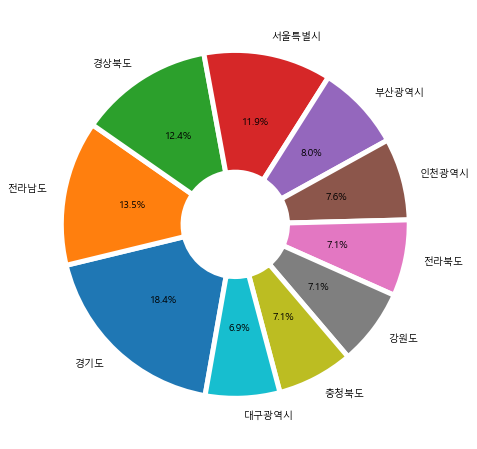

In [185]:
# 시도별 차량보유대수 상위 10개
carHoldCo = s['carHoldCo'].to_list()[:10]
district = s['district'].to_list()[:10]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig,axe = plt.subplots(1,1,figsize=(15,8))

plt.pie(carHoldCo, labels=district, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [149]:
center_map = folium.Map(location=[37.55, 126.98],
                zoom_start=8)

for i in range(len(center)):
    marker01 = folium.Marker(
        location=[center.loc[i,'latitude'],
        center.loc[i,'longitude']
        ],
        popup=center.loc[i,"cnterNm"],
        icon = folium.Icon(color='blue'))
    marker01.add_to(center_map)

center_map